<a href="https://colab.research.google.com/github/aayush9753/LearningResources/blob/master/albumentations_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Execute each cell separately ("Run all" is not working for now)
## 2. Adjust the values using sliders and dropdowns

In [2]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"
  
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Dryocopus_pileatus_MP2.jpg/600px-Dryocopus_pileatus_MP2.jpg -q -O example.jpg

import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display, HTML 

from albumentations import (VerticalFlip, HorizontalFlip, Flip, RandomRotate90, Rotate, ShiftScaleRotate, CenterCrop, OpticalDistortion, GridDistortion, ElasticTransform, JpegCompression, HueSaturationValue,
                            RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise, CLAHE, ChannelShuffle, InvertImg, RandomGamma, ToGray, PadIfNeeded 
                           )


def show_img(img, figsize=(8, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img)
    plt.imshow(img)
    

def show_augmentation(img, augmenation, **params):
    params_code = ', '.join(f'{key}={value}' for key, value in params.items())
    if params_code:
      params_code += ', '
    text = HTML(
        'Use this augmentation in your code:'
        '<pre style="display:block; background-color: #eee; margin: 10px; padding: 10px;">'
        f'{augmenation.__class__.__name__}({params_code}p=0.5)'
        '</pre>'
    )
    display(text)
    show_img(img)
    

image = cv2.imread('example.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (512, 512))

display(HTML('<h3>Original image</h3>'))
show_img(image)

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-vuxtildj
All libraries are successfully installed!


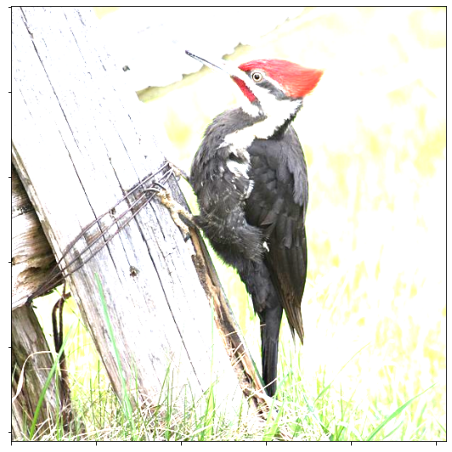

In [39]:
#@title RandomBrightness { run: "auto", vertical-output: true, display-mode: "form" }
alpha = 1.8 #@param {type:"slider", min:0, max:5, step:0.1}
aug = RandomBrightness(p=1)
img = aug.apply(image, alpha=alpha)
show_augmentation(img, aug, limit=alpha)

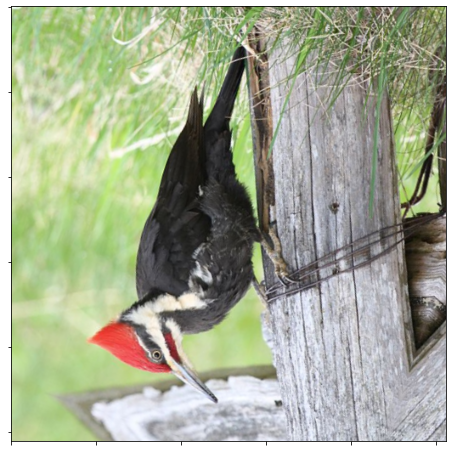

In [36]:
#@title Rotate { run: "auto", vertical-output: true, display-mode: "form" }
angle = 162 #@param {type:"slider", min:0, max:360, step:1}
aug = Rotate(p=1)
img = aug.apply(image, angle=angle)
show_augmentation(img, aug, limit=angle)

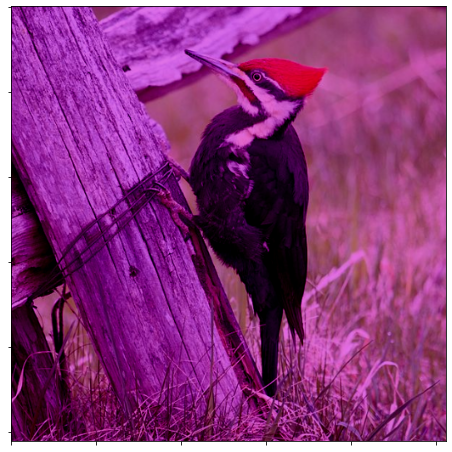

In [85]:
#@title RGBShift { run: "auto", vertical-output: true, display-mode: "form" }
r_shift = -141 #@param {type:"slider", min:-255, max:255, step:1}
g_shift = -142 #@param {type:"slider", min:-255, max:255, step:1}
b_shift = -142 #@param {type:"slider", min:-255, max:255, step:1}

aug = RGBShift(p=1)
img = aug.apply(image, r_shift=r_shift, g_shift=g_shift, b_shift=b_shift)
show_augmentation(img, aug, r_shift_limit=abs(r_shift), g_shift_limit=abs(g_shift), b_shift_limit=abs(b_shift))

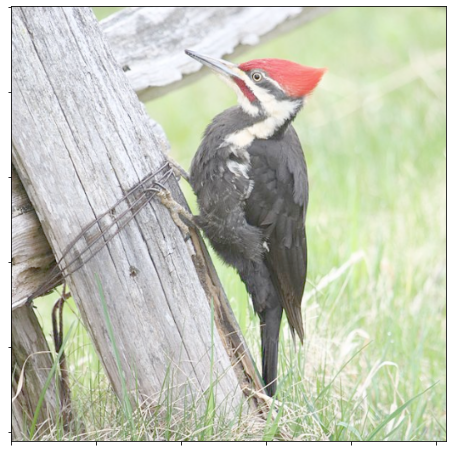

In [76]:
#@title RandomGamma { run: "auto", vertical-output: true, display-mode: "form" }
gamma = 55 #@param {type:"slider", min:0, max:255, step:1}
aug = RandomGamma(p=1)
image_for_augmentation = image.copy()
img = aug.apply(image_for_augmentation, gamma=gamma / 100)
show_augmentation(img, aug, gamma_limit=gamma)

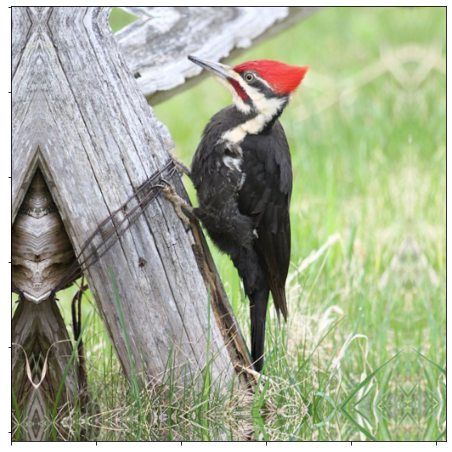

In [35]:
#@title ElasticTransform { run: "auto", vertical-output: true, display-mode: "form" }
alpha = 206 #@param {type:"slider", min:0, max:255, step:1}
alpha_affine = 1 #@param {type:"slider", min:0, max:255, step:1}
sigma = 232 #@param {type:"slider", min:0, max:255, step:1}
aug = ElasticTransform(p=1)
image_for_augmentation = image.copy()
img = aug.apply(image_for_augmentation, alpha=alpha, sigma=sigma, alpha_affine=alpha_affine)
show_augmentation(img, aug, alpha=alpha, sigma=sigma, alpha_affine=alpha_affine)

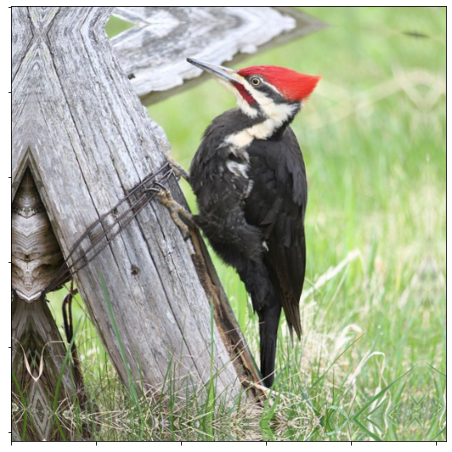

In [45]:
#@title OpticalDistortion { run: "auto", vertical-output: true, display-mode: "form" }
distort_limit = 0.3 #@param {type:"slider", min:0, max:1, step:0.05}
shift_limit = 0.05 #@param {type:"slider", min:0, max:1, step:0.05}
aug = OpticalDistortion(p=1)
image_for_augmentation = image.copy()
img = aug.apply(image_for_augmentation, k=distort_limit, dx=shift_limit, dy=shift_limit)
show_augmentation(img, aug, distort_limit=distort_limit, shift_limit=shift_limit)

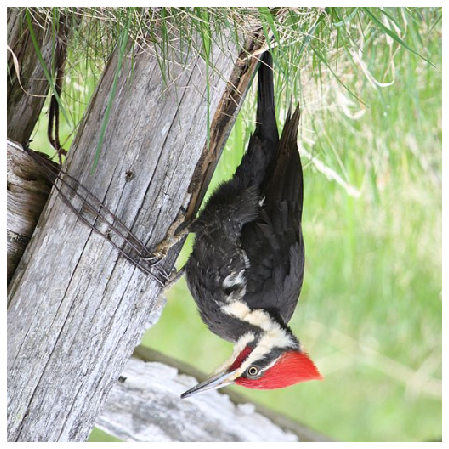

In [ ]:
#@title VerticalFlip { run: "auto", vertical-output: true, display-mode: "form" }
state = "enabled" #@param ["enabled", "disabled"]
aug = VerticalFlip(p=1)
img = aug.apply(image) if state == 'enabled' else image
show_augmentation(img, aug)

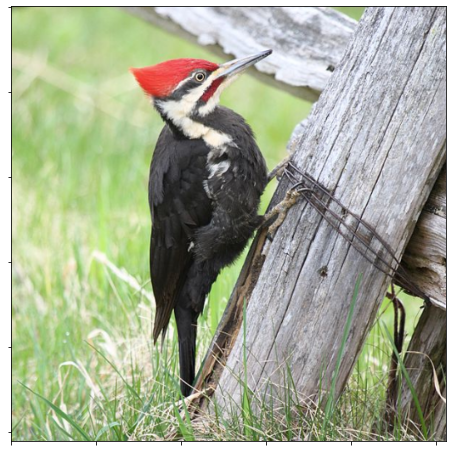

In [75]:
#@title HorizontalFlip { run: "auto", vertical-output: true, display-mode: "form" }
state = "enabled" #@param ["enabled", "disabled"]
aug = HorizontalFlip(p=1)
img = aug.apply(image) if state == 'enabled' else image
show_augmentation(img, aug)

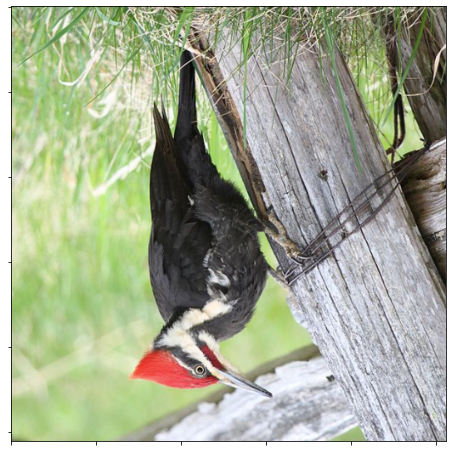

In [74]:
#@title Flip { run: "auto", vertical-output: true, display-mode: "form" }
state = "Both Horizontal and Vertical" #@param ["Vertical", "Horizontal", "Both Horizontal and Vertical", "Disabled"]
state_to_code = {
    "Both Horizontal and Vertical": -1,
    "Vertical": 0,
    "Horizontal": 1,
}
aug = Flip(p=1)
if state == "Disabled":
  img = image
else:
  img = aug.apply(image, d=state_to_code[state])
show_augmentation(img, aug)

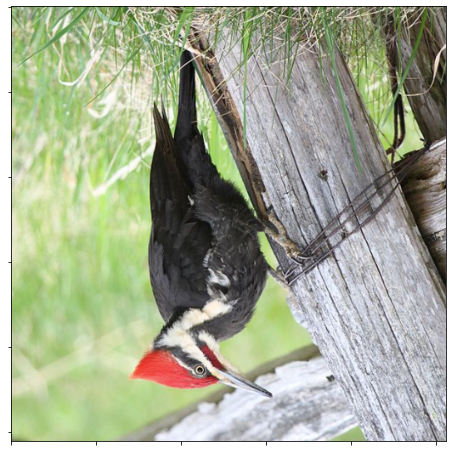

In [69]:
#@title RandomRotate90 { run: "auto", vertical-output: true, display-mode: "form" }
angle = 180 #@param [0, 90, 180, 270] {type:"raw"}
aug = RandomRotate90(p=1)
img = aug.apply(image, factor=angle // 90)
show_augmentation(img, aug)

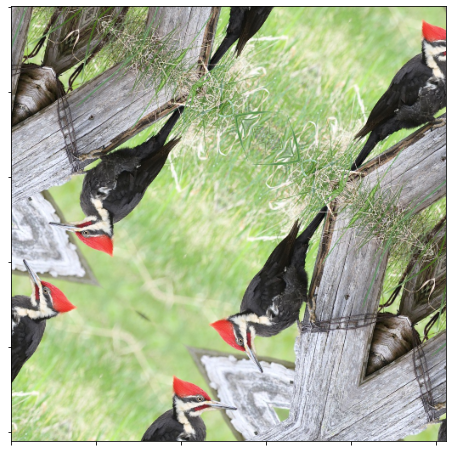

In [70]:
#@title ShiftScaleRotate { run: "auto", vertical-output: true, display-mode: "form" }
angle = 145 #@param {type:"slider", min:0, max:360, step:1}
shift = 0.15 #@param {type:"slider", min:0, max:1, step:0.05}
scale = 0.5 #@param {type:"slider", min:0, max:2, step:0.1}

aug = ShiftScaleRotate(p=1)
img = aug.apply(image, angle=angle, scale=scale, dx=shift, dy=shift)
show_augmentation(img, aug, shift_limit=shift, scale_limit=scale, rotate_limit=angle)

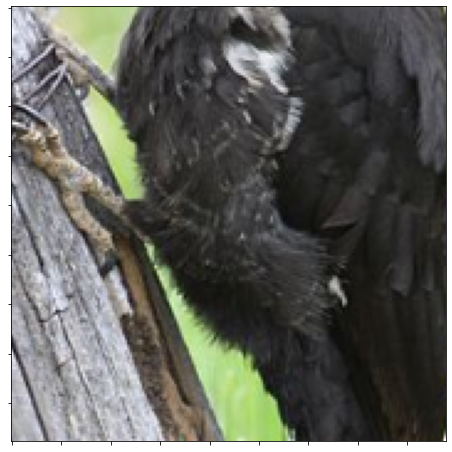

In [53]:
#@title CenterCrop { run: "auto", vertical-output: true, display-mode: "form" }
size = 176 #@param {type:"slider", min:32, max:512, step:16}
aug = CenterCrop(height=size, width=size, p=1)
img = aug.apply(image)
show_augmentation(img, aug, height=size, width=size)

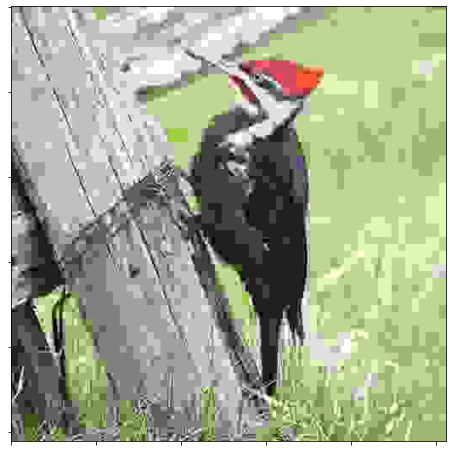

In [55]:
#@title JpegCompression { run: "auto", vertical-output: true, display-mode: "form" }
quality = 1 #@param {type:"slider", min:0, max:100, step:1}
aug = JpegCompression(p=1)
img = aug.apply(image, quality=quality)
show_augmentation(img, aug, quality_lower=quality, quality_upper=100)

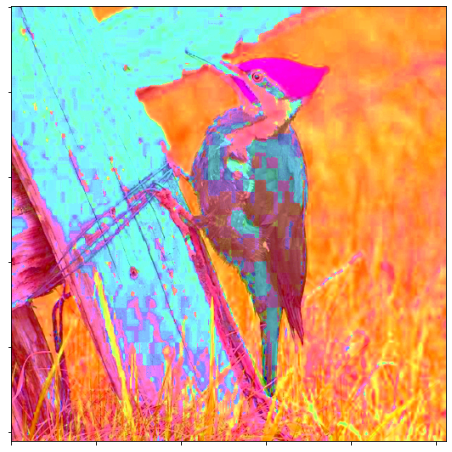

In [66]:
#@title HueSaturationValue { run: "auto", vertical-output: true, display-mode: "form" }
hue_shift = 153 #@param {type:"slider", min:0, max:180, step:1}
sat_shift = 116 #@param {type:"slider", min:0, max:255, step:1}
val_shift = 120 #@param {type:"slider", min:0, max:255, step:1}

aug = HueSaturationValue(p=1)
img = aug.apply(image, hue_shift=hue_shift, sat_shift=sat_shift, val_shift=val_shift)
show_augmentation(img, aug, hue_shift_limit=hue_shift, sat_shift_limit=sat_shift, val_shift_limit=val_shift)

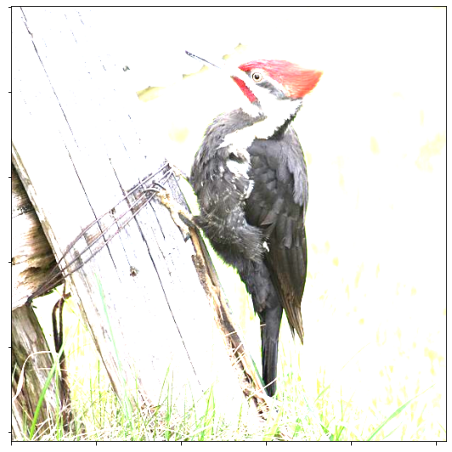

In [68]:
#@title RandomContrast { run: "auto", vertical-output: true, display-mode: "form" }
alpha = 2.2 #@param {type:"slider", min:0, max:3, step:0.1}
aug = RandomContrast(p=1)
img = aug.apply(image, alpha=alpha)
show_augmentation(img, aug, limit=alpha)